In [1]:
setwd("~/Upd-Germline-Genomics")

In [2]:
source("_targets.R")

Loading required package: viridisLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [12]:
library(cowplot)
library(ggplot2)
library(ggrastr)
library(scales)

In [3]:
tar_load(
  c(
    Upd_sc,
    Upd_decontX,
    shuffle_feature_plot
  )
)

In [19]:
Upd_sc[["DECONTX"]] <- Upd_decontX
DefaultAssay(Upd_sc) <- "DECONTX"

In [22]:
as.matrix(Upd_decontX@layers$counts[1:5, 1:5])

0,0.0000000,0.9998914,0,0
0,0.0000000,0.0000000,0,0
0,0.0000000,0.0000000,0,0
0,0.0000000,0.0000000,0,0
0,0.9402282,0.0000000,0,0


In [23]:
as.matrix(Upd_decontX@layers$data[1:5, 1:5])

0,0.000000,0.9386617,0,0
0,0.000000,0.0000000,0,0
0,0.000000,0.0000000,0,0
0,0.000000,0.0000000,0,0
0,1.331692,0.0000000,0,0


In [20]:
FetchData(Upd_sc, c("batch", "H3-GFP")) %>%
  group_by(batch) %>%
  summarise(
    across(
      everything(),
      list(
        mean=mean,
        sd=sd,
        max=max
      )
    )
  )

batch,H3-GFP_mean,H3-GFP_sd,H3-GFP_max
<chr>,<dbl>,<dbl>,<dbl>
nos.1,0.1450077,0.4183177,2.532882
nos.2,0.2123052,0.5311138,2.788700
tj.1,0.2506126,0.6045344,2.916852
tj.2,0.1365121,0.4554848,2.777753


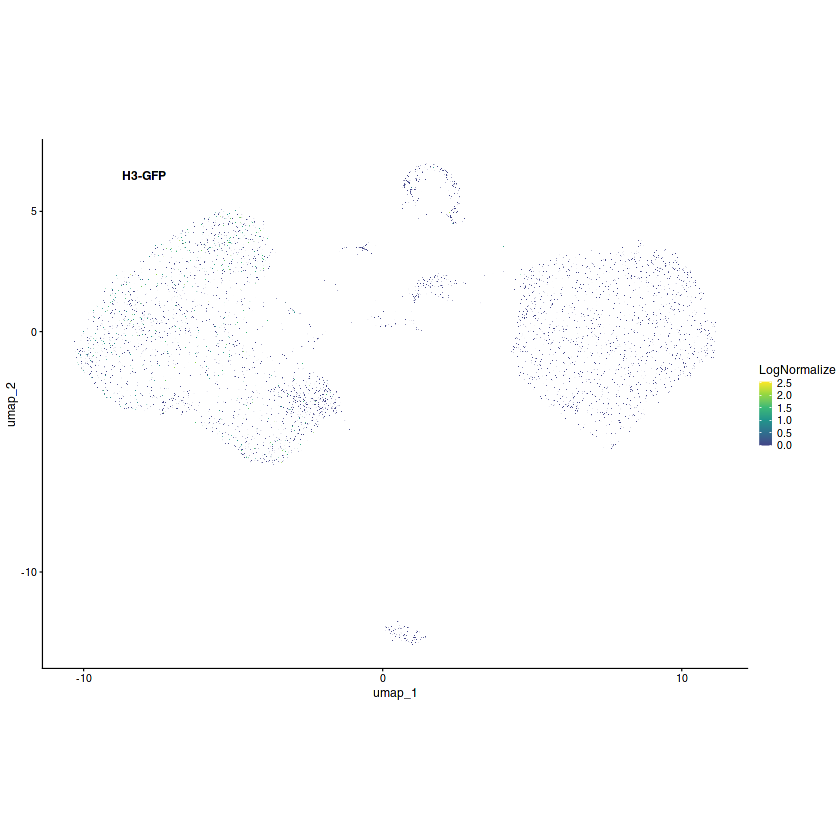

In [24]:
Upd_sc_feature_plot(
  subset(Upd_sc, batch == "nos.1"),
  "H3-GFP",
  grep("nos.1", shuffle_feature_plot, value=T),
  assay="DECONTX"
)

In [16]:
library(egg)
library(grid)

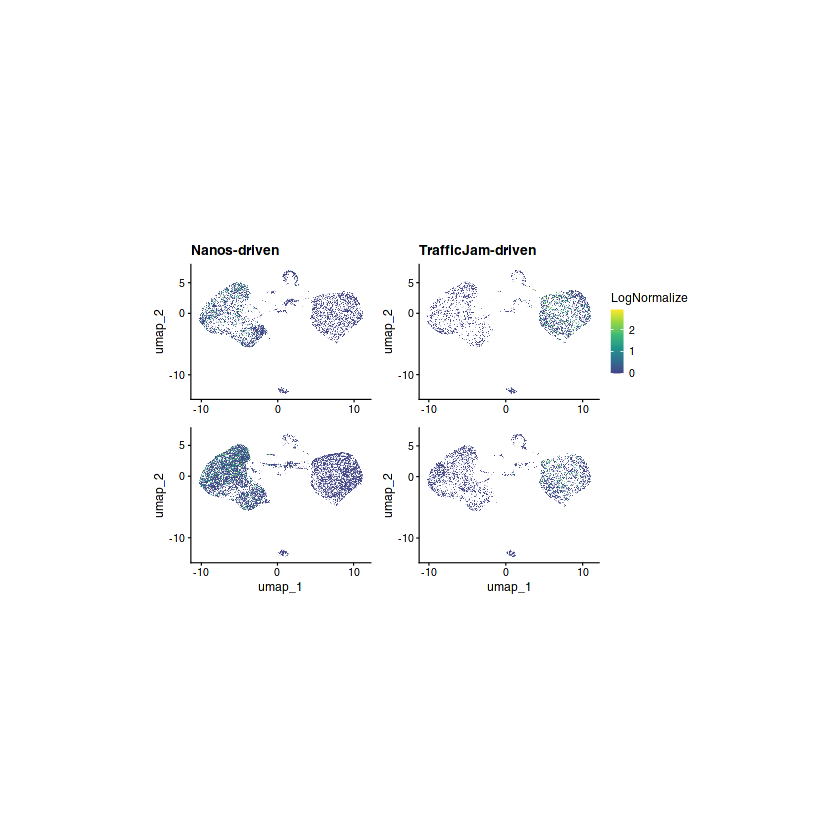

In [41]:
w <- unit(1.5, "in")
h <- unit(0.75 * 1.5, "in")
max_expr <- max(unlist(FetchData(Upd_sc, "H3-GFP")))
report <- cbind(
  rbind(
    set_panel_size(
      Upd_sc_feature_plot(
        subset(Upd_sc, batch == "nos.1"),
        "H3-GFP",
        grep("^nos.1", shuffle_feature_plot, value=T),
        assay="DECONTX"
      ) +
        geom_blank(
          data = tibble(umap_1=0, umap_2=0, LogNormalize=max_expr)
        ) +
        labs(title = "Nanos-driven", tag = NULL, x = NULL) +
        theme(legend.position = "none"),
      w = w,
      h = h
    ),
    set_panel_size(
      Upd_sc_feature_plot(
        subset(Upd_sc, batch == "nos.2"),
        "H3-GFP",
        grep("^nos.2", shuffle_feature_plot, value=T),
        assay="DECONTX"
      ) +
        geom_blank(
          data = tibble(umap_1=0, umap_2=0, LogNormalize=max_expr)
        ) +
        labs(title = NULL, tag = NULL) +
        theme(legend.position = "none"),
      w = w,
      h = h
    )
  ),
  rbind(
    set_panel_size(
      Upd_sc_feature_plot(
        subset(Upd_sc, batch == "tj.1"),
        "H3-GFP",
        grep("^tj.1", shuffle_feature_plot, value=T),
        assay="DECONTX"
      ) +
        geom_blank(
          data = tibble(umap_1=0, umap_2=0, LogNormalize=max_expr)
        ) +
        labs(title = "TrafficJam-driven", tag = NULL, x = NULL),
      w = w,
      h = h
    ),
    set_panel_size(
      Upd_sc_feature_plot(
        subset(Upd_sc, batch == "tj.2"),
        "H3-GFP",
        grep("^tj.2", shuffle_feature_plot, value=T),
        assay="DECONTX"
      ) +
        geom_blank(
          data = tibble(umap_1=0, umap_2=0, LogNormalize=max_expr)
        ) +
        labs(title = NULL, tag = NULL) +
        guides(
          color = guide_colorbar(
            "",
            barwidth = 0,
          )
        ) +
        theme(
          legend.text = element_text(color = "transparent"),
        ),
      w = w,
      h = h
    )
  )
)
grid.draw(report)

In [42]:
ggsave("figure/Integrated-scRNAseq/Gene-H3-GFP.pdf", report, w=6, h=6)